# Linear classifier

In [1]:
import time
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import model_selection

%matplotlib inline

In [2]:
from src.data import Data
from src.plothelp import * 
import src.data_set_image_manip

In [3]:
data = Data("img")
data.load_pickle("100x100.pickle")
X_train, X_test, y_train, y_test = data.train_test_split()

(4698, 100, 100, 3)


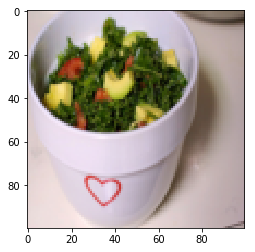

In [4]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
print(X_train.shape)
plt.imshow(X_train[398].astype('uint8'))# plot image from the dataset to see how it looks


X_trains = np.reshape(X_train, (X_train.shape[0], -1)) #flatten the image
X_tests = np.reshape(X_test, (X_test.shape[0], -1)) #

In [43]:
start = time.time()
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_trains, y_train)
end = time.time()
elapsed = end - start
print("Classifier train in ", elapsed, "seconds")
print(logreg)

Classifier train in  946.5438416004181 seconds
LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [44]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_trains[:, 0].min() - .5, X_trains[:, 0].max() + .5
y_min, y_max = X_trains[:, 1].min() - .5, X_trains[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

NameError: name 'h' is not defined

In [26]:
start = time.time()
y=logreg.predict(X_tests)
end = time.time()
elapsed = end - start
print("Classifier train in ", elapsed, "seconds")
confusion_matrix(y,y_test)

Classifier train in  0.15711092948913574 seconds


array([[57, 26, 33, 13],
       [29, 55, 23, 16],
       [29, 15, 43, 18],
       [24, 31, 32, 78]])

Confusion matrix, without normalization
[[57 26 33 13]
 [29 55 23 16]
 [29 15 43 18]
 [24 31 32 78]]


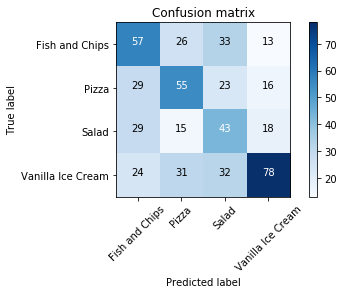

In [28]:
matrix = confusion_matrix(y,y_test)
plot_confusion_matrix(matrix,logreg.classes_)

In [30]:
print(classification_report(y, y_test))
print("Test Data accuracy  score", accuracy_score(y, y_test)*100,"%")

                   precision    recall  f1-score   support

   Fish and Chips       0.41      0.44      0.43       129
            Pizza       0.43      0.45      0.44       123
            Salad       0.33      0.41      0.36       105
Vanilla Ice Cream       0.62      0.47      0.54       165

      avg / total       0.47      0.45      0.45       522

Test Data accuracy  score 44.6360153257 %


## Search for the best Hyper paremeters

In [6]:
clf = linear_model.LogisticRegression()
parameter_grid = {"penalty": ["l1", "l2"],'C': [ 0.1, 1, 10, 100],
                  "solver" : ["newton-cg", "lbfgs", "sag"],
                  "multi_class" : ["ovr", "multinomial"]
                 }

start = time.time()

search = model_selection.RandomizedSearchCV(clf, parameter_grid, n_jobs=-1, n_iter=1, verbose=0) #run jobs in paralel if supported
search.fit(X_trains, y_train)

end = time.time()
elapsed = end - start
print("Classifier tested in ", elapsed, "seconds")

Classifier tested in  39082.74137544632 seconds


C:\Users\laurynas\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [8]:
print(search.best_estimator_)
print(search.best_score_)
print(search.best_params_)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)
0.530651340996
{'C': 0.001, 'multi_class': 'multinomial', 'solver': 'sag', 'penalty': 'l2'}


In [11]:
y_pred = search.best_estimator_.predict(X_tests)

Confusion matrix, without normalization
[[64 22 30 14]
 [28 72 27 17]
 [30 16 53 22]
 [17 17 21 72]]


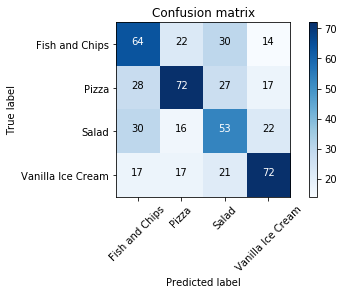

In [13]:
matrix = confusion_matrix(y_pred,y_test)
plot_confusion_matrix(matrix,search.best_estimator_.classes_)


In [16]:
print(classification_report(y_pred, y_test))

                   precision    recall  f1-score   support

   Fish and Chips       0.46      0.49      0.48       130
            Pizza       0.57      0.50      0.53       144
            Salad       0.40      0.44      0.42       121
Vanilla Ice Cream       0.58      0.57      0.57       127

      avg / total       0.50      0.50      0.50       522



In [18]:
print("Test Data accuracy  score", accuracy_score(y_pred, y_test)*100,"%")

Test Data accuracy  score 50.0 %


## Multi layer percepton

In [36]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam',activation = "relu", alpha=0.1,
                  hidden_layer_sizes=(100, 4), random_state=1, learning_rate ="adaptive")

In [37]:
start = time.time()
clf.fit(X_trains, y_train)
end = time.time()
elapsed = end - start
print("Classifier trained in ", elapsed, "seconds")

Classifier trained in  3208.1339893341064 seconds


C:\Users\laurynas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [40]:
y=clf.predict(X_tests)

Confusion matrix, without normalization
[[  0   0   0   0]
 [  0   0   0   0]
 [139 127 131 125]
 [  0   0   0   0]]


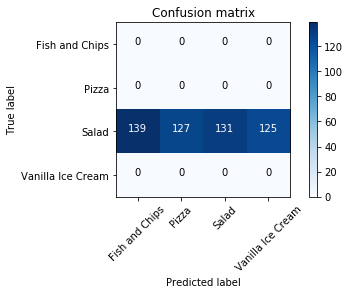

In [41]:
matrix = confusion_matrix(y,y_test)
plot_confusion_matrix(matrix,search.best_estimator_.classes_)

In [31]:
print(classification_report(y, y_test))
print("Test Data accuracy  score", accuracy_score(y, y_test)*100,"%")

                   precision    recall  f1-score   support

   Fish and Chips       0.00      0.00      0.00         0
            Pizza       0.00      0.00      0.00         0
            Salad       1.00      0.25      0.40       522
Vanilla Ice Cream       0.00      0.00      0.00         0

      avg / total       1.00      0.25      0.40       522

Test Data accuracy  score 25.0957854406 %


C:\Users\laurynas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
